# The Keras Functional API

## Input Layers

The shape of the Input layer defines how many variables your neural network will use. For example, if the input data has 10 columns, you define an Input layer with a shape of `(10,)`

In [1]:
# Import Input, Dense from keras.layers
from keras.layers import Input, Dense

# Create an input layer of shape 1
input_tensor = Input(shape=(1,))

## Dense Layers

Dense layers learn a weight matrix, where the `nrows` of the matrix is the dimension of the input data, and the `ncols` is the dimension of the output data (or number of weights)

In [2]:
# Dense layer
output_layer = Dense(1, name='Predicted-Score-Diff')

# Connect the dense layer to the input_tensor
output_tensor = output_layer(input_tensor)

In [3]:
# Create a dense layer and connect the dense layer to the input_tensor in one step
# Note that we did this in 2 steps in the previous exercise, but are doing it in one step now
output_tensor = Dense(1)(input_tensor)

## Build and compile

In [4]:
# Build the model
from keras.models import Model
model = Model(input_tensor, output_tensor)

In [5]:
# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error')

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


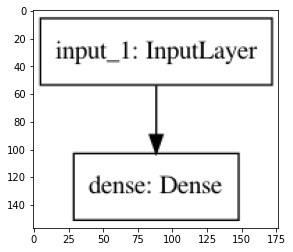

In [6]:
# Import the plotting function
from keras.utils import plot_model
import matplotlib.pyplot as plt

# Summarize the model
model.summary()

# Plot the model
plot_model(model, to_file='data/model.png')

# Display the image
data = plt.imread('data/model.png')
plt.imshow(data)
plt.show()

## Fit the model to the tournament basketball data

In [7]:
import pandas as pd

In [8]:
games_tourney = pd.read_csv('data/games_tourney.csv')
games_tourney_train = games_tourney.iloc[0:int(games_tourney.shape[0]*0.8)]
games_tourney_test = games_tourney.iloc[int(games_tourney.shape[0]*0.8):]

In [9]:
# Now fit the model
model.fit(games_tourney_train['seed_diff'], games_tourney_train['score_diff'],
          epochs=1,
          batch_size=128,
          validation_split=0.1,
          verbose=True)

24/24 [==============================] - 0s 11ms/step - loss: 16.5772 - val_loss: 16.2146


In [10]:
# Load the X variable from the test data
X_test = games_tourney_test['seed_diff']

# Load the y variable from the test data
y_test = games_tourney_test['score_diff']

# Evaluate the model on the test data
print(model.evaluate(X_test, y_test, verbose=False))

15.50861644744873
